# Data Science - Big Data Technologies 24 📊🔍

## MongoDB 📝

This notebook represents my submission for the first exam part in Big Data Technologies for the summer semester of 2024.

### Authors 👥
- **Martin Brucker** (942815) 🧑‍💻

**Due**: 17.05.2024 at 23:59

**Contact Information**: martin.brucker@student.fh-kiel.de 📧


In [27]:
# installing the reccomended python mongodb tool
# !pip install pymongo

from pymongo import MongoClient
import datetime
import random
import string
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
# Connect to the MongoDB server
client = MongoClient("localhost", 27017)

# Access the test database
db = client.test_database

In [29]:
# generating 100 random posts
for i in range(100):
    post = {
        "author": random.choices(["Martin","Tim","Mike","John","Jane","Alice","Bob","Charlie","David","Eve","Frank","Grace","Heidi","Ivan","Judy","Kevin","Larry","Mallory","Nancy","Oscar","Peggy","Quentin","Romeo","Sierra","Tango","Umbrella","Victor","Wendy","Xavier","Yvonne","Zelda"], k=1)[0],
        "text": ''.join(random.choices(string.ascii_uppercase + string.digits, k=100)),
        "tags": ["mongodb", "python", "pymongo"],
        "date": datetime.datetime(random.randint(2024, 2024), random.randint(1, 12), random.randint(1, 28), random.randint(0, 23), random.randint(0, 59), random.randint(0, 59), tzinfo=datetime.timezone.utc),
    }
    db.posts.insert_one(post).inserted_id

In [30]:
# show the number of posts
print(db.posts.count_documents({}))

902


Text(0, 0.5, 'Number of Posts')

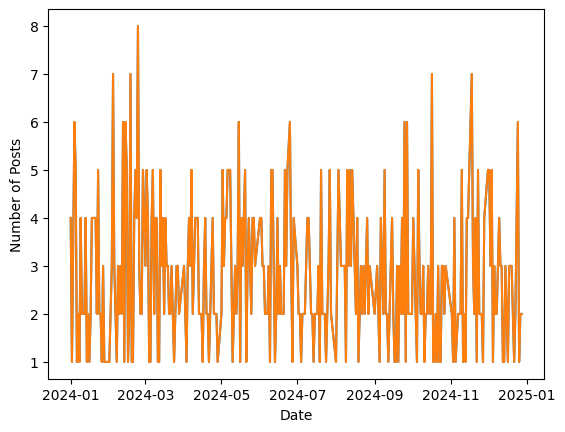

In [31]:
# Get all posts from the database
cursor = db.posts.find({})
df = pd.DataFrame(list(cursor))
df['date'] = pd.to_datetime(df['date'])

# Group DataFrame by date and count the number of posts per date
post_counts = df.groupby(df['date'].dt.date).size().reset_index(name='post_count')

# Plotting the post counts over time
plt.plot(post_counts['date'], post_counts['post_count'])

# Plotting the post counts over time
plt.plot(post_counts['date'], post_counts['post_count'])

# Add axis labels
plt.xlabel('Date')
plt.ylabel('Number of Posts')

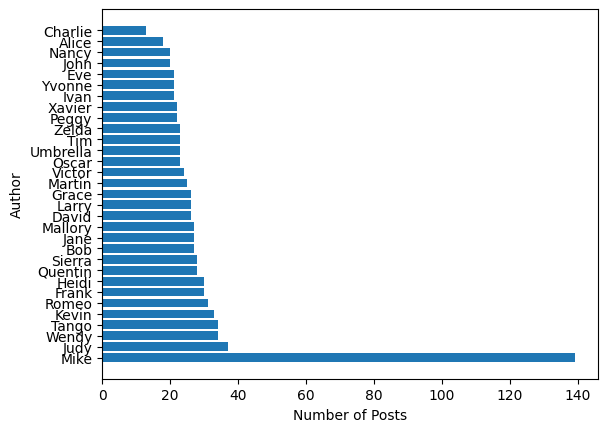

In [32]:
# Get the counts of posts per author
author_counts = df['author'].value_counts()

# Plotting the horizontal bar chart
plt.barh(author_counts.index, author_counts.values)
plt.xlabel('Number of Posts')
plt.ylabel('Author')
plt.show()

In [33]:
# Update a document
db.posts.update_one({"author": "Martin"}, {"$set": {"author": "Martin G."}})
print(db.posts.find_one({"author": "Martin G."}))

{'_id': ObjectId('6638e5256a52f73a99686c6c'), 'author': 'Martin G.', 'text': 'OZ4R9YR8CKVQN0QFOVOBKVY14RXWBKH2QQ8WBAITL5TEMXLURYIN93RBQRT9Z9VFA4VZHLF5WBLCI9T8GEF5FANE47K04Y0X0NMO', 'tags': ['mongodb', 'python', 'pymongo'], 'date': datetime.datetime(2024, 9, 21, 15, 36, 19)}


In [34]:
# Delete a document
db.posts.delete_one({"author": "Martin G."})
print(db.posts.find_one({"author": "Martin G."}))

None
